In [1]:
# import libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk import RegexpParser

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

from gensim.models import Word2Vec, LdaModel 

from wordcloud import WordCloud

from tqdm.notebook import tqdm

pd.options.display.max_colwidth=100

In [2]:
# read the data

df = pd.read_csv('Books_Dataset.csv')

In [3]:
# data cleaning

df.drop_duplicates('Title', keep ='first', inplace = True)
df.drop_duplicates('Synopsis', keep ='first', inplace = True, ignore_index = True)

In [4]:
# create a copy

df_original = df.copy()

In [5]:
df_original

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling auth...,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for whom art was not merely a thing of beauty but a vita...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Power to keep them all in awe, they are in that condi...",International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,"A handful of grain is found in the pocket of a murdered businessman…\n\nRex Fortescue, king of a...",Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling the world with its unrivalled presentation of the v...",Photography Textbooks,"Arts, Film & Photography"
...,...,...,...,...,...,...,...,...
6714,Five Comic One-Act Plays (Dover Thrift Editions),Anton Pavlovich Chekhov,"Paperback,– 2 Jul 1999",5.0 out of 5 stars,1 customer review,"One of the foremost dramatists of the 19th century, Russian author Anton Chekhov (1860–1904) cre...",Plays (Books),Humour
6715,Left Politics in Bengal,Monobina Gupta,"Paperback,– 2010",4.0 out of 5 stars,1 customer review,This remarkable book traces the Left Front governments rise to power in the wake of the Emergenc...,Government (Books),Politics
6716,The Kite Runner Graphic Novel,Khaled Hosseini,"Paperback,– 6 Sep 2011",4.0 out of 5 stars,5 customer reviews,The perennial bestseller-now available as a sensational new graphic novel.\nSince its publicatio...,Humour (Books),Humour
6717,Panzer Leader (Penguin World War II Collection),Heinz Guderian,"Paperback,– 22 Sep 2009",3.5 out of 5 stars,3 customer reviews,Heinz Guderian - master of the Blitzkrieg and father of modern tank warfare - commanded the Germ...,United States History,"Biographies, Diaries & True Accounts"


In [6]:
# get the actual number of the rating from the reviews

df_original['Reviews'] = df_original['Reviews'].apply(lambda x: x.split(' ')[0])

df_original['Reviews'] = pd.to_numeric(df_original['Reviews'])

In [7]:
# calculate the average review score for the Author Agatha Christie

sum(df_original[df_original['Author'] == 'Agatha Christie']['Reviews'])/df_original[df_original['Author'] == 'Agatha Christie']['Reviews'].shape[0]

4.250000000000002

In [8]:
# count of total reviews

df_original[df_original['Author'] == 'Agatha Christie']['Reviews'].shape[0]

78

In [9]:
# calculate the average review score for Ladybird

sum(df_original[df_original['Author'] == 'Ladybird']['Reviews'])/df_original[df_original['Author'] == 'Ladybird']['Reviews'].shape[0]

4.25483870967742

In [10]:
# count of total reviews

df_original[df_original['Author'] == 'Ladybird']['Reviews'].shape[0]

62

In [11]:
# calculate the average review score for DK

sum(df_original[df_original['Author'] == 'DK']['Reviews'])/df_original[df_original['Author'] == 'DK']['Reviews'].shape[0]

4.491071428571429

In [12]:
# count of total reviews

df_original[df_original['Author'] == 'DK']['Reviews'].shape[0]

56

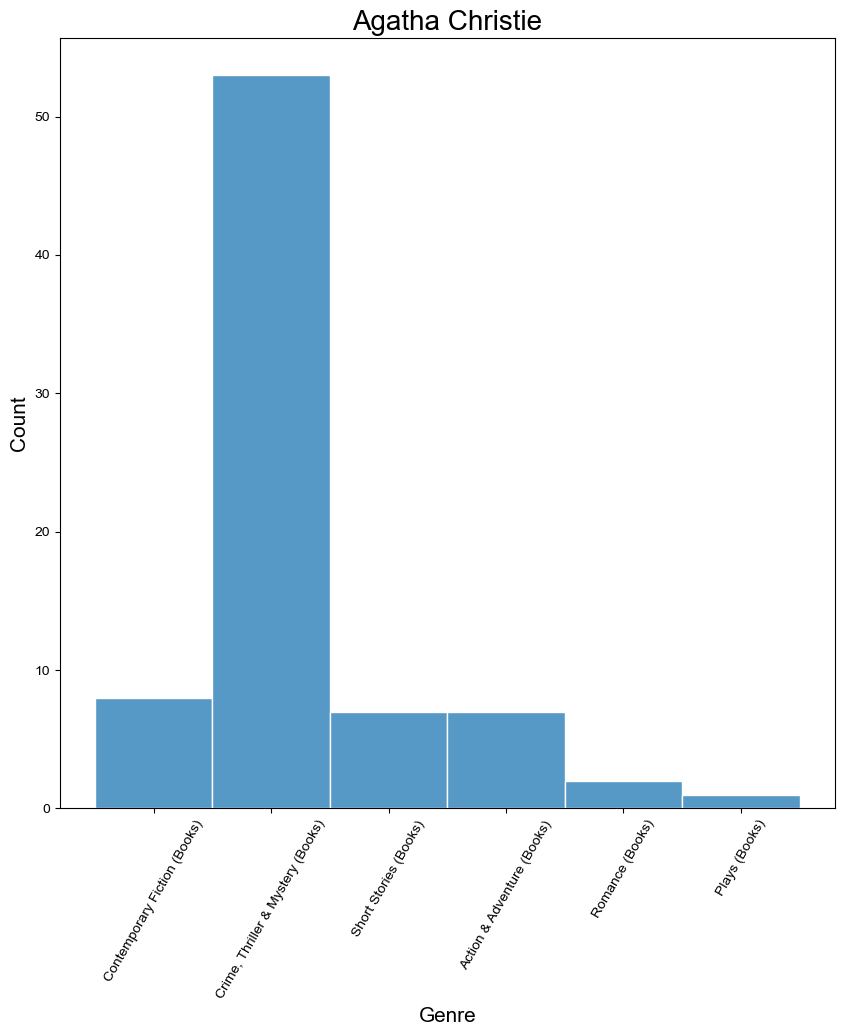

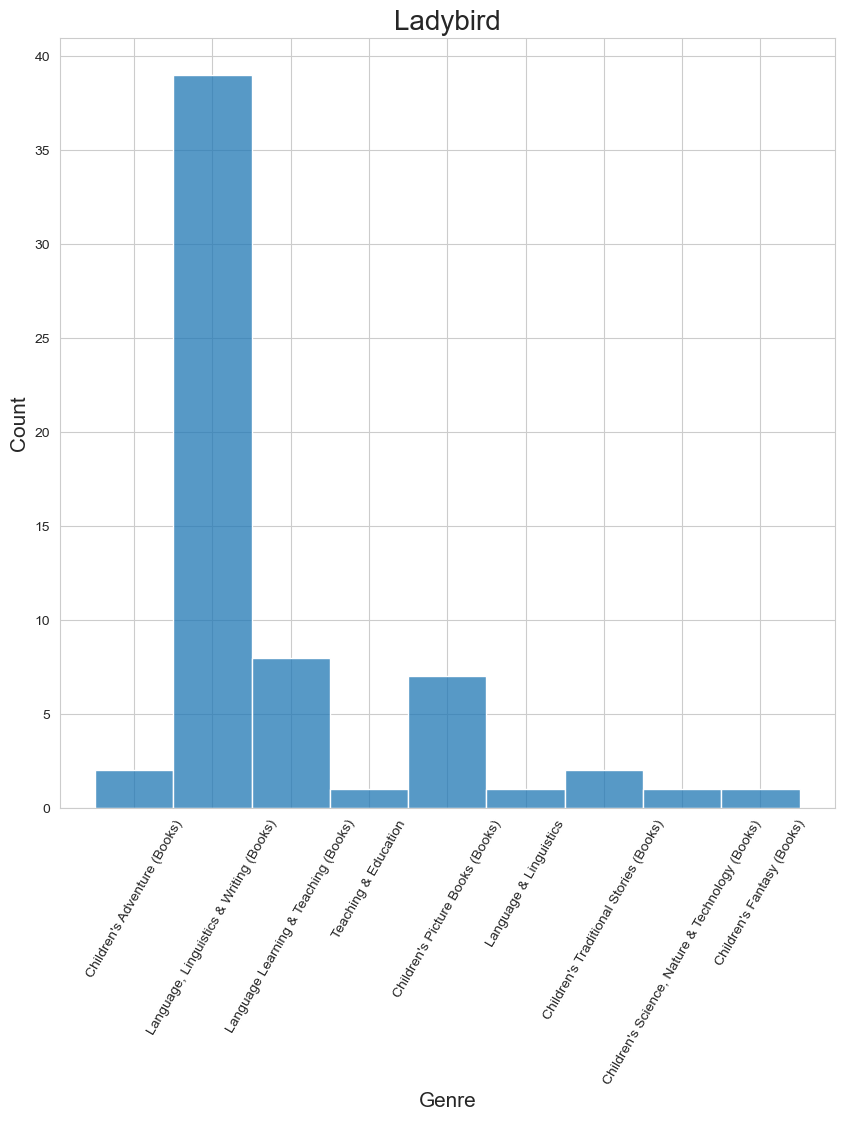

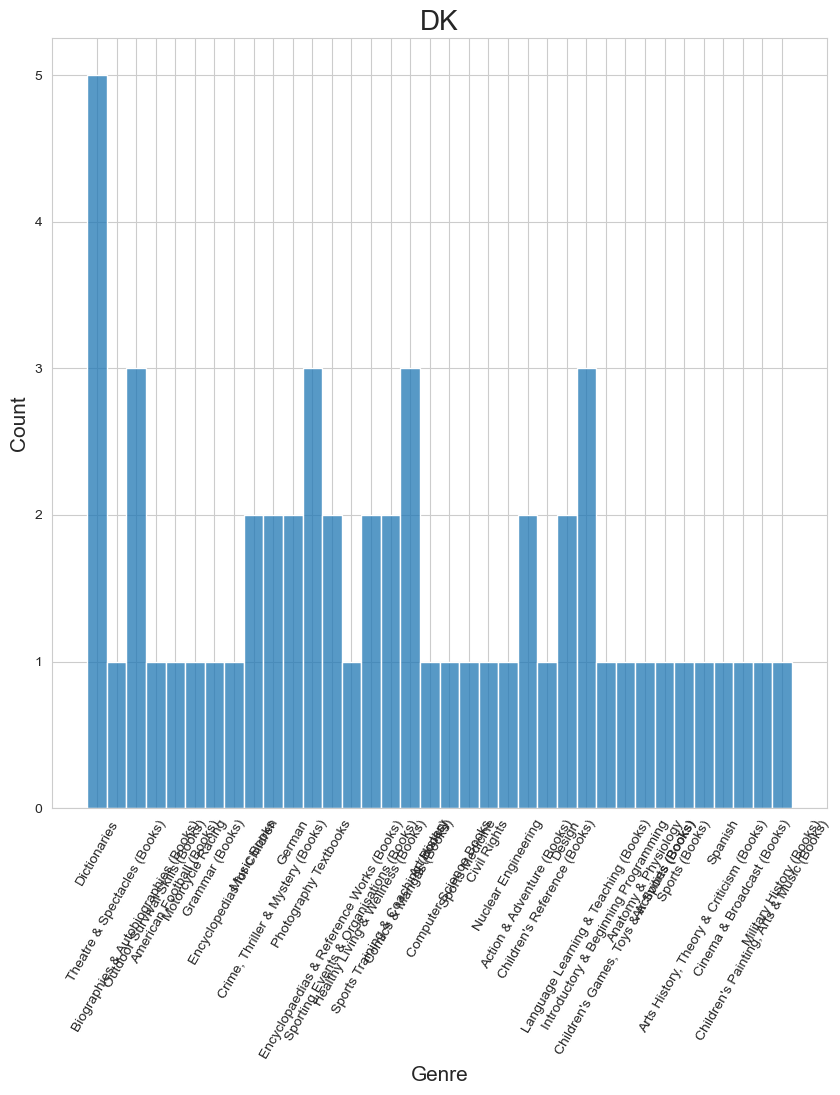

In [13]:
# plot the Author's Genre Distribution as observed in the Dataframe

for i in df_original['Author'].value_counts().head(3).index:
    plt.figure(figsize=(10,10))
    plt.title(str(i),size=20)
    plt.xlabel('Genre',size=15)
    plt.ylabel('Count',size=15)
    plt.xticks(rotation=60)
    sns.set_style('whitegrid')
    sns.histplot(df_original[df_original['Author'] == i].Genre,bins=df_original.Genre.value_counts().shape[0])



In [14]:
# print all the titles of the Author DK

df_original[df_original['Author'] == 'DK']

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
70,"5 Language Visual Dictionary: English, French, German, Spanish, Italian (Dictionaries)",DK,"Hardcover,– 1 Sep 2016",4.0,4 customer reviews,"The Five Language Visual Dictionary puts the perfect English, French, German, Spanish or Italian...",Dictionaries,"Language, Linguistics & Writing"
314,The Movie Book: Big Ideas Simply Explained,DK,"Hardcover,– 2 Nov 2015",4.4,3 customer reviews,Explore the rich history of cinema like never before - from the golden age of black-and-white fi...,Theatre & Spectacles (Books),"Arts, Film & Photography"
400,The Literature Book: Big Ideas Simply Explained,DK,"Hardcover,– 1 Mar 2016",4.4,10 customer reviews,Exploring more than 100 of the world's most important literary works and the literary geniuses t...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts"
710,The Survival Handbook,DK,"Paperback,– 1 Sep 2016",5.0,1 customer review,"Survive anything life throws at you with The Survival Handbook.\nServed in a handy mess tin, The...",Outdoor Survival Skills (Books),Sports
786,The Football Book (Dk),DK,"Hardcover,– 15 Dec 2018",3.3,4 customer reviews,Discover the world's best teams and biggest competitions with the ultimate visual guide to footb...,American Football (Books),Sports
794,The Motorbike Book (Dk Sports & Activities),DK,"Hardcover,– 1 Dec 2012",4.5,4 customer reviews,"About the Book. An action packed ride through the history of the motorcycle featuring over 1,000...",Motorcycle Racing,Sports
814,English for Everyone English Grammar Guide: A comprehensive visual reference,DK,"Flexibound,– 1 Dec 2016",4.7,8 customer reviews,"""Puzzled by past tenses? Confused by comparatives? This comprehensive, beautifully presented gui...",Grammar (Books),"Language, Linguistics & Writing"
921,Spider-Man - Character Encyclopedia,DK,"Hardcover,– 1 Apr 2014",4.1,7 customer reviews,"Discover fascinating facts about Marvel comics' friendly neighborhood hero, Spider-Man, and read...",Encyclopedias for Children,Comics & Mangas
1158,The Classical Music Book (Big Ideas),DK,"Hardcover,– 27 Sep 2018",5.0,2 customer reviews,"From Mozart to Mendelssohn, this comprehensive guide to classical music history and classical mu...",Music Books,"Arts, Film & Photography"
1167,English for Everyone English Vocabulary Builder,DK,"Paperback,– Import, 4 Jan 2018",3.9,3 customer reviews,Expand your English vocabulary with this unique combination of illustrated vocabulary reference ...,"Crime, Thriller & Mystery (Books)","Language, Linguistics & Writing"


In [15]:
# print the 5 authors with the most titles

df_original['Author'].value_counts().head(5)

Agatha Christie    78
Ladybird           62
DK                 56
James Patterson    37
Herge              34
Name: Author, dtype: int64

In [16]:
# removing some columns

df.drop(['Author','Edition','Reviews','Ratings'],inplace=True,axis=1)

In [17]:
# save in a set all the english stop words in order to remove them later 

stop_words = set(stopwords.words('english'))

In [18]:
# define a function that returns only the words that are not in stop_words variable

def fltr(text):
    filter_words = []
    for w in text:
        if w not in stop_words:
            filter_words.append(w)
    return filter_words

In [19]:
# remove punctuation

df['Synopsis'] = df['Synopsis'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df['Title'] = df['Title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [20]:
# word tokenization

df['Synopsis'] = df['Synopsis'].apply(lambda x: word_tokenize(x.lower()))  
df['Title'] = df['Title'].apply(lambda x: word_tokenize(x.lower()))  

In [21]:
# apply the function fltr we just created

df['Synopsis'] = df['Synopsis'].apply(fltr)  
df['Title'] = df['Title'].apply(fltr)  

In [22]:
# print the titles after transformations

df['Title']

0                               [prisoners, gold, hunters, 3]
1                          [guru, dutt, tragedy, three, acts]
2                              [leviathan, penguin, classics]
3                           [pocket, full, rye, miss, marple]
4               [life, 70, years, extraordinary, photography]
                                ...                          
6714    [five, comic, oneact, plays, dover, thrift, editions]
6715                                 [left, politics, bengal]
6716                           [kite, runner, graphic, novel]
6717    [panzer, leader, penguin, world, war, ii, collection]
6718                          [complete, spanish, stepbystep]
Name: Title, Length: 6719, dtype: object

In [23]:
# initialize a WordNetLemmatizer instance

lemmatizer = WordNetLemmatizer()

In [24]:
# create a function to use the lemmatizer

def lem_list(lst):
    lemlist = []
    for i in lst:
        lemlist.append(lemmatizer.lemmatize(i))
    return lemlist

In [25]:
# apply the function lem_list

df['Synopsis'] = df['Synopsis'].apply(lem_list)  
df['Title'] = df['Title'].apply(lem_list)  

In [26]:
# create a fucntion for part of speech (POS) tagging

tag_filter = ["NN","NNS","NNP","NNPS","RB","RBR","RBS","JJ","JJR","JJS"]

def postag(lst):
    z = pos_tag(lst)
    clean_list = []
    for i,j in z:
        if j in tag_filter:
            clean_list.append(i)
    return clean_list

In [27]:
# apply the fucntion 
postag
df['Synopsis'] = df['Synopsis'].apply(postag)
df['Title'] = df['Title'].apply(postag)

In [28]:
# create a function to rejoin the title lists

def rejoin(lst):    
    h = " ".join(lst)
    return h

In [29]:
# apply the function rejoin

df['Title'] = df['Title'].apply(rejoin)

In [30]:
# print the result

df['Title']

0                                prisoner gold hunter
1                               guru dutt tragedy act
2                           leviathan penguin classic
3                         pocket full rye miss marple
4                 life year extraordinary photography
                            ...                      
6714           comic oneact play dover thrift edition
6715                                    left politics
6716                        kite runner graphic novel
6717    panzer leader penguin world war ii collection
6718                      complete spanish stepbystep
Name: Title, Length: 6719, dtype: object

In [31]:
# initialize a CountVectorizer instance

cv = CountVectorizer()

In [32]:
# transfrom through the vectorizer the titles 

titles=cv.fit_transform(df['Title'])

In [33]:
# print the titles after transformation

titles

<6719x6774 sparse matrix of type '<class 'numpy.int64'>'
	with 26967 stored elements in Compressed Sparse Row format>

In [34]:
# create dummy variables for the last 2 columns (Genre & Book Category)

dummies = pd.get_dummies(df[df.columns[-2:]],drop_first=True)

In [35]:
# create an 2D array with the "dummyfied" values of each title

df_rec = np.append(titles.toarray(),dummies.values,axis=1)

In [36]:
# create a funciton that returns all the info of a book

def book(index):
    print(df_original.iloc[index])
    print()

In [37]:
# create a funciton that recommends books

def recommender(index,num_of_books):
    print('Book : ')
    book(index=index) 
    similarity = (1-cosine_similarity(df_rec[index:index+1],df_rec)) 
    item_arg = similarity.argsort() 
    for x in range(1,num_of_books+1):
        print('Suggestion No: {:1.0f}: '.format(x))
        book(item_arg.reshape(-1,1).flatten()[x])

In [38]:
# call the function to see results

recommender(6715,6)

Book : 
Title                                                                                       Left Politics in Bengal
Author                                                                                               Monobina Gupta
Edition                                                                                            Paperback,– 2010
Reviews                                                                                                         4.0
Ratings                                                                                           1 customer review
Synopsis        This remarkable book traces the Left Front governments rise to power in the wake of the Emergenc...
Genre                                                                                            Government (Books)
BookCategory                                                                                               Politics
Name: 6715, dtype: object

Suggestion No: 1: 
Title             